# Throw the coin (but this time throw it 10 times)

We have seen that the probability of coin outcome (whether head or tail) will be 0.5 when we repeat the experiment multiple time. This is called the law of large number. The probability of particular events will be true, or close to real value when the sample numbers increase. In our previous small project, we have seen that the probability of head or tail outcome will converge at 0.5 when the number of samples become close to 100.

Let's think about multiple coin throwing in single event. In single event, let's say we want to throw the coin 10 times. What is the probability that out of that 10 throws, 5 of them are heads? My intuition told me that because coin throwing outcome - which is either head or tail - probability is 50%, the probability that 5 out of 10 throws will be head is also 50%. 

This is actually really wrong. The outcome of 5 heads out of 10 throws is intuitively and theoretically the highest of all other outcome but it is not that common. The probability would be around 0.246. This follow binomial probability distribution. We are gonna take a step into that. 

In [1]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
# generate coin throwing event --> generate random number between 0 and 1.
# 0 for tail and 1 for head

def throw_coin():
    return random.randint(0,1)

throw_coin() # note that the outcome is random. It can be 0 and it can also easily be 1.

0

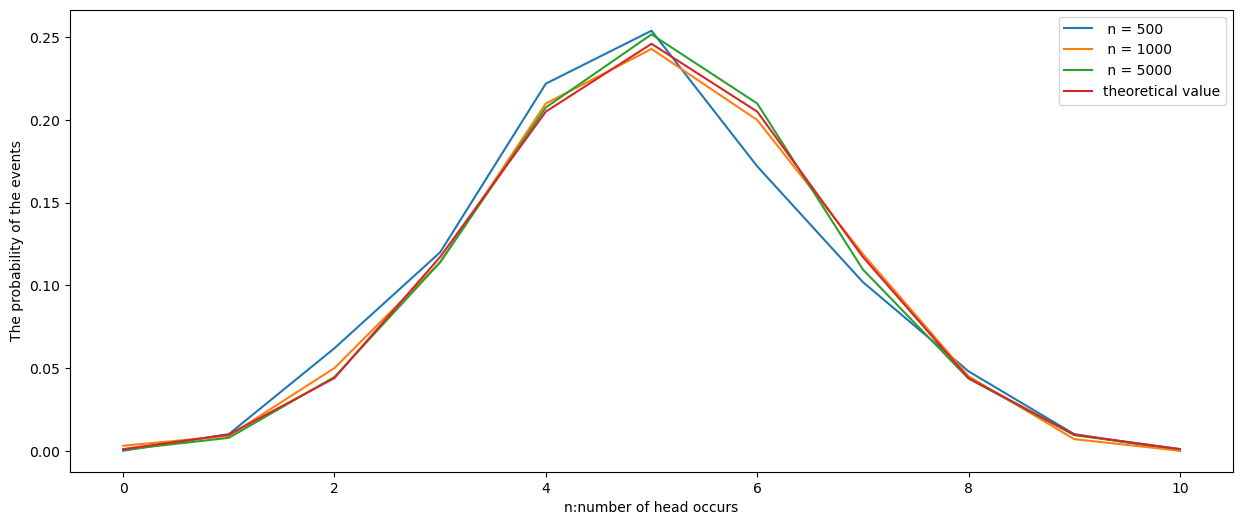

,0,1,2,3,4,5,6,7,8,9,10
0,0.002,0.0140,0.0360,0.1040,0.176,0.258,0.2240,0.138,0.042,0.0060,0.0000
1,0.000,0.0040,0.0460,0.1140,0.217,0.223,0.2140,0.119,0.050,0.0120,0.0010
2,0.001,0.0108,0.0414,0.1156,0.212,0.245,0.2064,0.113,0.045,0.0086,0.0012


In [32]:
# desired_outcome:  desired outcome of one event ( we gonna use head, so 1 for head)
# throw_count: number of throw per one event (for below only 10 throw per one event)  
# return the number of desired outcome for an event

def coin(desired_outcome,throw_count):
    result = 0
    for i in range(throw_count):
        if throw_coin() == desired_outcome:
            result = result + 1
    return result

# repeat the event multiple times
# number_of_trials, n : number of events made (for below 500 times) 
# possible outcome : because we throw the coin 10 times, the possible outcome may be 0,1,2,3 .. 9 ,10

def search_prob(numbers_of_trials):
    outcome = []
    for j in range(numbers_of_trials):
        outcome.append(coin(1,10))  # this will result in the number of heads come up in an event of 10 times coin throwing , it can be 0,1,2,3,4,5 ... 9 ,10

    # calculate the probability of getting the possible outcome
    # for example, when possible_outcome = 3, we are gonna count the probability that in an event of 10 throw, 3 out of them will be heads 
    
    prob = []
    possible_outcomes = [0,1,2,3,4,5,6,7,8,9,10]
    for k in possible_outcomes:
        num_of_events = [x for x in outcome if x == k] # this will result in list of the same outcome. say possible_outcomes = 3, it will return all events with 3 heads outcome
        prob.append(len(num_of_events)/numbers_of_trials) # probability = calculate the number of events that happen based on possible outcome and divide with the whole number of events
    return prob

trials = np.arange(0,11,1)
# theoretical value according to binomial distibution
# this return the probability of 1,2,3...9,10 of head outcome
prob = []
for i in range(0,11):
    p = math.comb(10,i) * ( (1/2) ** i ) * ((1/2)** (10-i))
    prob.append(p)

# see the graph if the number of events is 500, 1000 and 5000
# we can see that the number of events 500 diverged from the true value, theoretical value
# as the numbers of the events increase, it will diverge to the real value of the binomial probability 
    
plt.figure(figsize=(15,6))  
plt.plot(trials, search_prob(500), label = ' n = 500 ')
plt.plot(trials, search_prob(1000), label = ' n = 1000 ')
plt.plot(trials, search_prob(5000), label = ' n = 5000 ')
plt.plot(trials,prob, label = 'theoretical value')
plt.xlabel('n:number of head occurs')
plt.ylabel('The probability of the events')
plt.legend()
plt.show()

pd.DataFrame([search_prob(500), search_prob(1000), search_prob(5000)])

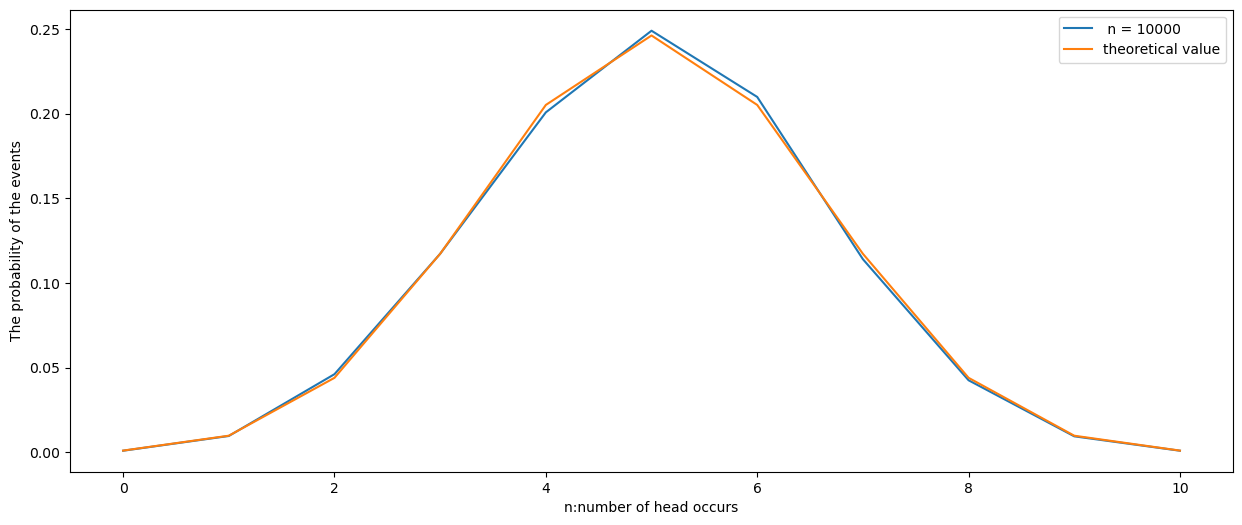

In [58]:
# lastly, I want to use huge events size which is n = 10000 and compare it theoretical value
# the experiment values are close to theoretical value, again because law of large number
# throwing 10 coins event require huge amount of trials for us to get the true value of its probabilities

plt.figure(figsize=(15,6))  
plt.plot(trials, search_prob(10000), label = ' n = 10000 ')
plt.plot(trials,prob, label = 'theoretical value')
plt.xlabel('n:number of head occurs')
plt.ylabel('The probability of the events')
plt.legend()
plt.show()

In [60]:
# the dataframe for expreiment value and theoretical value will be as below
# the probability of 5 heads outcome is 0.246, as opposed to my intuition of 0.5
# the probabilities distribution surely affirm my intuition 
# the probability in the middle, which number of heads of 4,5 and 6 sure is high compared to other 
# the probability of 0 and 10 are so rare that it will happen less than 1 in 1000 events. 

df = pd.DataFrame([search_prob(10000) , prob])
df.index = ['Experiment value','Theoretical value']
df

,0,1,2,3,4,5,6,7,8,9,10
Experiment value,0.001100,0.009100,0.043400,0.121000,0.203600,0.243800,0.205100,0.119300,0.042400,0.010500,0.000700
Theoretical value,0.000977,0.009766,0.043945,0.117188,0.205078,0.246094,0.205078,0.117188,0.043945,0.009766,0.000977
